In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
# I had to change the instructor's from pandas.io.data import DataReader to the following:
from pandas_datareader import DataReader
#It still gave me a future warning, but I think I'll still be able to do the exercises

In [5]:
from datetime import datetime

In [6]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [7]:
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

In [9]:
#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)
#Using globals() sets the stock name as the dataframe name in this case - instructor's shortcut

In [20]:
AAPL.describe()
#Now using the stock name is the dataframe name and we can do the usual things like describe() for math specs

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,246.288293,240.756945,243.197539,243.744444,3.349892e+07,242.735571
std,43.240837,42.009895,42.499219,42.864125,1.728919e+07,43.397587
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.719727
25%,206.859997,203.500000,204.372494,205.060005,2.184540e+07,203.270809
50%,244.020004,237.009995,240.055000,240.709999,2.839870e+07,240.066170
75%,281.189995,272.390007,277.035004,276.307503,3.825268e+07,276.307503
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,327.200012


In [21]:
AAPL.info()
#info() can be used for column and row specs

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-04-29 to 2020-04-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 21.8 KB


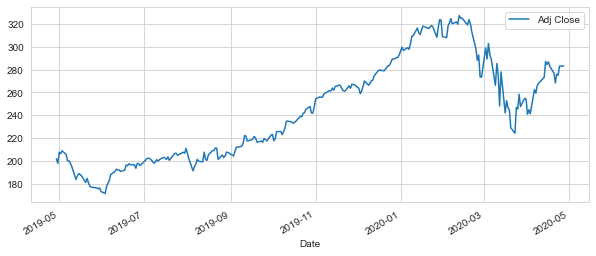

In [24]:
#Using indexing, we can choose what we want to plot with .plot as shown below:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))
#The legend usually auto populates for me, but the figsize=() was awesome to learn to make my visualizations scale better.
#I applied it to a few other items with good results, but I'm still getting stuck when trying to figure out which 
# items should be graphed and how.

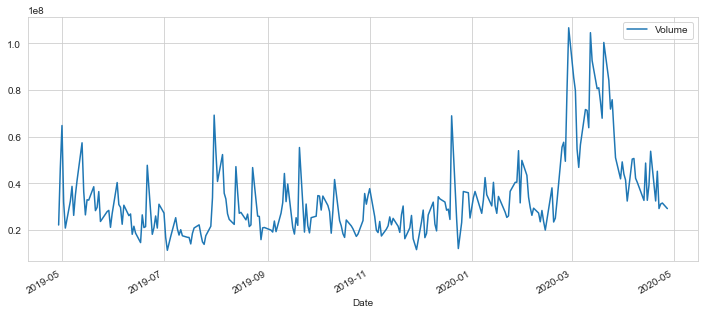

In [25]:
AAPL['Volume'].plot(legend=True, figsize=(12,5))
# Here we just keep picking different columns to index with the stock name and the .plot with the figsize to make it readable.

In [50]:
#pandas has a built-in rolling mean calculator
#this allows us to calculate MA (moving averages) which is nothing more than the mean of specific numbers over time.

ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    #The instructor's line of AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma) had to be changed as shown below:
    #This was very hard to find online and I had to infer it from a solution given to someone on stackoverflow
    AAPL[column_name]=AAPL['Adj Close'].rolling(ma).mean()

In [54]:
AAPL.drop(columns='MA for 100 days')

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2019-04-29,205.970001,203.860001,204.399994,204.610001,22204700.0,201.966461,NaN,NaN,NaN
2019-04-30,203.399994,199.110001,203.059998,200.669998,46534900.0,198.077362,NaN,NaN,NaN
2019-05-01,215.309998,209.229996,209.880005,210.520004,64827300.0,207.800110,NaN,NaN,NaN
2019-05-02,212.649994,208.130005,209.839996,209.149994,31996300.0,206.447800,NaN,NaN,NaN
2019-05-03,211.839996,210.229996,210.889999,211.750000,20892400.0,209.014221,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-04-21,277.250000,265.429993,276.279999,268.369995,45247900.0,268.369995,275.300995,262.520498,276.728798
2020-04-22,277.899994,272.200012,273.609985,276.100006,29264300.0,276.100006,276.967996,263.981498,275.819798
2020-04-23,281.750000,274.869995,275.869995,275.029999,31203600.0,275.029999,277.863995,265.456998,274.928198


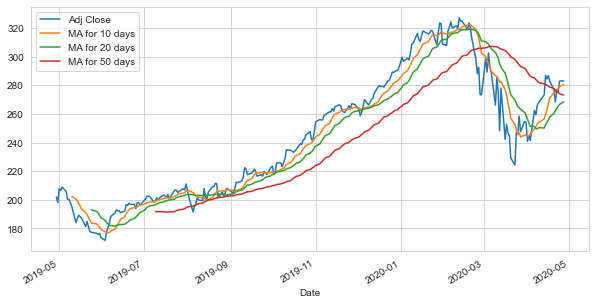

In [55]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False,figsize=(10,5) )

In [56]:
#I forgot the () at the end of the "rolling.mean()" solution and it wouldn't show all of the moving averages on the viz